
# Udacity Project 1: TMDB Movie Data Analysis

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction
>The Movie Database (TMDB) is a popular user editable database for movies and TV shows. In this project we analyze a dataset containing information, about 10,000 movies obtained from The movie Database(TMDB).
>The dataset consists of columns providing information on Popularity, User ratings, movie budgets, revenue, cast members and genres.
>The cast and genre's columns contain multiple values, seperated by pipe(|) characters. The final two columns ending with _"adj"_ show the revenue of the associated movie in terms of 2010 dollars accounting for inflation over time.
>In this analysis, we use the data from this dataset to answer the following questions.

> ### Questions
1. What is the most popular movie of all time?
2. What movie has the highest budget and revenue?
3. Does user ratings have any effect on movie popularity?
4. How does user ratings affect the revenue of a movie?
5. Are movies with expensive budgets profitable?
6. What is the movie  with the highest Profit?
7. Does User Ratings have any effect on Profit?
8. Does Run time affect the popularity of a movie?
9. What is the year with the highest number of movie release?


In [98]:
# Import packages
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline


In [99]:
# Load dataset and view dataset
movie_df = pd.read_csv('tmdb-movies.csv')
movie_df.head()


,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08
2,262500,tt2908446,13.112507,110000000,295238201,Insurgent,Shailene Woodley|Theo James|Kate Winslet|Ansel...,http://www.thedivergentseries.movie/#insurgent,Robert Schwentke,One Choice Can Destroy You,...,Beatrice Prior must confront her inner demons ...,119,Adventure|Science Fiction|Thriller,Summit Entertainment|Mandeville Films|Red Wago...,3/18/15,2480,6.3,2015,1.012000e+08,2.716190e+08
3,140607,tt2488496,11.173104,200000000,2068178225,Star Wars: The Force Awakens,Harrison Ford|Mark Hamill|Carrie Fisher|Adam D...,http://www.starwars.com/films/star-wars-episod...,J.J. Abrams,Every generation has a story.,...,Thirty years after defeating the Galactic Empi...,136,Action|Adventure|Science Fiction|Fantasy,Lucasfilm|Truenorth Productions|Bad Robot,12/15/15,5292,7.5,2015,1.839999e+08,1.902723e+09
4,168259,tt2820852,9.335014,190000000,1506249360,Furious 7,Vin Diesel|Paul Walker|Jason Statham|Michelle ...,http://www.furious7.com/,James Wan,Vengeance Hits Home,...,Deckard Shaw seeks revenge against Dominic Tor...,137,Action|Crime|Thriller,Universal Pictures|Original Film|Media Rights ...,4/1/15,2947,7.3,2015,1.747999e+08,1.385749e+09


<a id='wrangling'></a>
## Data Wrangling

> After studying the dataset and looking at the questions. For this analysis we'll be looking out for irrelevant columns, null values, duplicate values, columns with unique values and a brief summary statistic of the dataset.
### General Properties

In [100]:
# checking number of columns and rows
movie_df.shape

(10866, 21)

In [101]:
# checking fpr null values and data types
movie_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

In [102]:
# Number of unique values in eaach column
movie_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

In [103]:
# Sum of null values in each column
movie_df.isna().sum() 

id                         0
imdb_id                   10
popularity                 0
budget                     0
revenue                    0
original_title             0
cast                      76
homepage                7930
director                  44
tagline                 2824
keywords                1493
overview                   4
runtime                    0
genres                    23
production_companies    1030
release_date               0
vote_count                 0
vote_average               0
release_year               0
budget_adj                 0
revenue_adj                0
dtype: int64

In [104]:
# checking for duplicate values in dataset
movie_df.duplicated().sum()

1

In [105]:
# Brief summary statistics
movie_df.describe()

,id,popularity,budget,revenue,runtime,vote_count,vote_average,release_year,budget_adj,revenue_adj
count,10866.000000,10866.000000,1.086600e+04,1.086600e+04,10866.000000,10866.000000,10866.000000,10866.000000,1.086600e+04,1.086600e+04
mean,66064.177434,0.646441,1.462570e+07,3.982332e+07,102.070863,217.389748,5.974922,2001.322658,1.755104e+07,5.136436e+07
std,92130.136561,1.000185,3.091321e+07,1.170035e+08,31.381405,575.619058,0.935142,12.812941,3.430616e+07,1.446325e+08
min,5.000000,0.000065,0.000000e+00,0.000000e+00,0.000000,10.000000,1.500000,1960.000000,0.000000e+00,0.000000e+00
25%,10596.250000,0.207583,0.000000e+00,0.000000e+00,90.000000,17.000000,5.400000,1995.000000,0.000000e+00,0.000000e+00
50%,20669.000000,0.383856,0.000000e+00,0.000000e+00,99.000000,38.000000,6.000000,2006.000000,0.000000e+00,0.000000e+00
75%,75610.000000,0.713817,1.500000e+07,2.400000e+07,111.000000,145.750000,6.600000,2011.000000,2.085325e+07,3.369710e+07
max,417859.000000,32.985763,4.250000e+08,2.781506e+09,900.000000,9767.000000,9.200000,2015.000000,4.250000e+08,2.827124e+09


#### Observations
>We can see that the dataset contains 10866 entries and 21 columns. There are some columns that contain null values which includes;
**imdb_id, cast, homepage, director, tagline, keywords, overview, genres and production company**.

> The imdb_id, homepage, tagline, keywords, and production company columns are irrelevant to the analysis, so we'll just drop the columns and get rid of the null values in the useful columns. There is only one duplicate value, which will be dropped.

>From the brief summary statistics it is observed that the budget, revenue and runtime columns contain multiple zero values, we will look closely into that in the data cleaning section.

### Data Cleaning 
**As discussed earlier, we will be dropping unnecessary columns, dropping duplicate values, dropping null values and addressing the issue of multiple zero values in the following columns; budget, revenue and runtime. This is to achieve a consistent and concise data that will aid in ahieveing the best results from our analysis.**

In [106]:
# Drop unneccessary colums
movie_df.drop(['imdb_id', 'homepage', 'tagline', 'keywords', 'overview', 'production_companies', 'budget_adj', 'revenue_adj'], axis=1, inplace=True)
movie_df.head(1)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year
0,135397,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015


In [107]:
# Drop duplicates
movie_df.drop_duplicates(inplace=True)
movie_df.duplicated().sum()

0

In [108]:
# Drop null values
movie_df.dropna(inplace=True)
movie_df.isna().sum()

id                0
popularity        0
budget            0
revenue           0
original_title    0
cast              0
director          0
runtime           0
genres            0
release_date      0
vote_count        0
vote_average      0
release_year      0
dtype: int64

In [109]:
# Count of zero values in the budget column
movie_df.groupby('budget').count()['id']

budget
0            5578
1               4
2               1
3               3
5               1
             ... 
270000000       1
280000000       1
300000000       1
380000000       1
425000000       1
Name: id, Length: 553, dtype: int64

In [110]:
# Count of zero values in the revenue column
movie_df.groupby('revenue').count()['id']

revenue
0             5888
2                2
3                3
5                2
6                2
              ... 
1513528810       1
1519557910       1
1845034188       1
2068178225       1
2781505847       1
Name: id, Length: 4698, dtype: int64

In [111]:
# Count of zero value in the runtime column
movie_df.groupby('runtime').count()['id']

runtime
0      28
3       9
4      12
5      12
6      18
       ..
550     1
566     1
705     1
877     1
900     1
Name: id, Length: 243, dtype: int64

>The budget and revenue columns contain 5578 and 5888 zeros respectively which is more than half of the entries. So we will be overlooking these zero values to preserve data intergrity and we will fill them with null values to prevent them from affecting our summary statistics and visualizations.
>The runtime column has 28 zero values. So dropping them should't cause major damage.

In [112]:
# Replacing zero values with null in the budget and revenue colums.
cols = ['budget', 'revenue']
movie_df[cols] = movie_df[cols].replace({0:np.nan, 0:np.nan})

In [113]:
# Checking for zero values
movie_df.query('budget == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year


In [114]:
# Checking for zero values
movie_df.query('revenue == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year


In [115]:
#check if null values are present in budget and revenue columns
movie_df.isna().sum()

id                   0
popularity           0
budget            5578
revenue           5888
original_title       0
cast                 0
director             0
runtime              0
genres               0
release_date         0
vote_count           0
vote_average         0
release_year         0
dtype: int64

In [116]:
# Dropping zero values in runtime column
movie_df = movie_df[movie_df['runtime'] != 0]
movie_df.query('runtime == 0')

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year


In [117]:
# Confirming entries and columns
movie_df.shape

(10703, 13)

<a id='eda'></a>
## Exploratory Data Analysis

> Now that the dataset has been trimmed and cleaned, we are ready to move on to exploration. 
> We'll be computing statistics and creating visualizations with the goal of addressing the research questions that was posed in the Introduction section. 
> We'll be systematic with our approach and take a look at one variable at a time, and then follow it up by looking at relationships between variables.

### Question 1:   What is the most Popular Movie of all time?

In [118]:
#To get the most popular movie of all time, we will create a dataframe to filter for the top 10 most popular movies, in descending order
top10_movies = movie_df[['original_title', 'popularity', 'release_year']].sort_values(by='popularity', ascending=False).head(10)
top10_movies

,original_title,popularity,release_year
0,Jurassic World,32.985763,2015
1,Mad Max: Fury Road,28.419936,2015
629,Interstellar,24.949134,2014
630,Guardians of the Galaxy,14.311205,2014
2,Insurgent,13.112507,2015
631,Captain America: The Winter Soldier,12.971027,2014
1329,Star Wars,12.037933,1977
632,John Wick,11.422751,2014
3,Star Wars: The Force Awakens,11.173104,2015
633,The Hunger Games: Mockingjay - Part 1,10.739009,2014


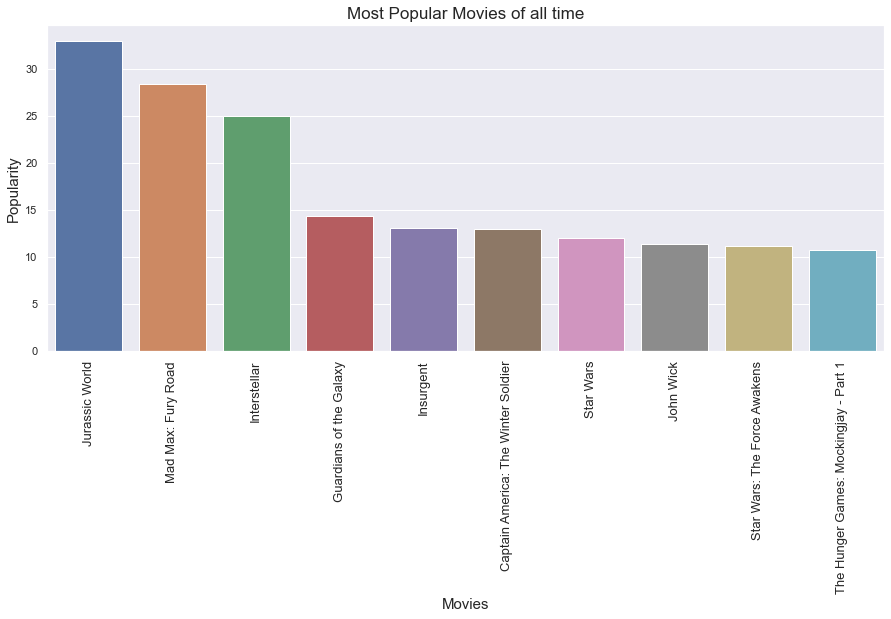

In [120]:
# Plotting a bar chart to show the most popular movie 
sns.barplot(x='original_title', y='popularity', data=top10_movies)
sns.set(rc={"figure.figsize":(15, 6)})
plt.title('Most Popular Movies of all time', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.xlabel('Movies', fontsize=15)
plt.ylabel('Popularity', fontsize=15);

> **The visualization above shows the top 10 movie of all time and, we can see that Jurassic World is the most popular movie of all time, it was released in 2015. What is intriguing is that Star Wars which was released as far back as 1977 also made the top 10 list.**

### Question 2 What movie has the highest budget and revenue?

In [121]:
#To get the movie with the highest budget we will filter out yje top 10 moview with the highest budget
top10_budget = movie_df[['original_title', 'budget']].sort_values(by='budget', ascending=False).head(10)
top10_budget

,original_title,budget
2244,The Warrior's Way,425000000.0
3375,Pirates of the Caribbean: On Stranger Tides,380000000.0
7387,Pirates of the Caribbean: At World's End,300000000.0
14,Avengers: Age of Ultron,280000000.0
6570,Superman Returns,270000000.0
4411,John Carter,260000000.0
1929,Tangled,260000000.0
7394,Spider-Man 3,258000000.0
5508,The Lone Ranger,255000000.0
4363,The Dark Knight Rises,250000000.0


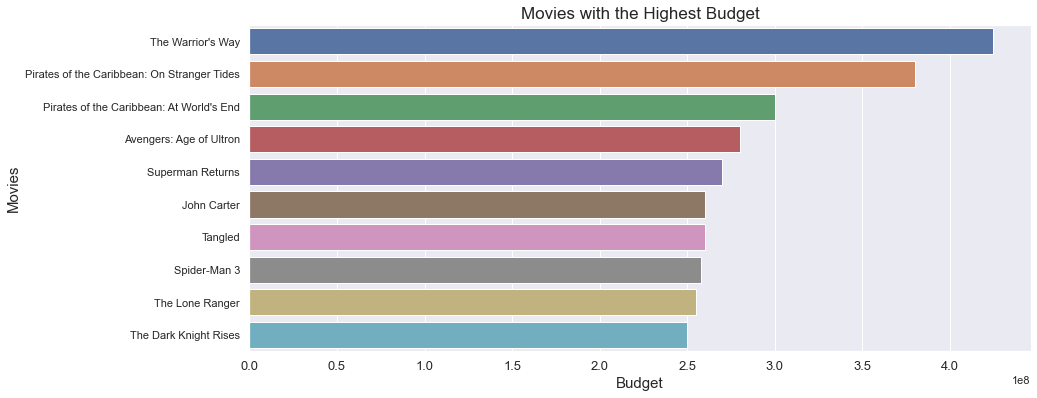

In [24]:
# Plotting a bar plot to show highest movie budget
sns.barplot(x='budget', y='original_title', data=top10_budget)
sns.set(rc={"figure.figsize":(14, 6)})
plt.title('Movies with the Highest Budget', fontsize=17)
plt.xticks(fontsize=13)
plt.xlabel('Budget', fontsize=15)
plt.ylabel('Movies', fontsize=15);

> **From the visual above we can see that The Warrior's Way is the movie with the highest budget.** 

In [122]:
#To get the movie with the highest revenue we will filter out the top 10 movies with the highest revenue
top10_rev = movie_df[['original_title', 'revenue']].sort_values(by='revenue', ascending=False).head(10)
top10_rev

,original_title,revenue
1386,Avatar,2.781506e+09
3,Star Wars: The Force Awakens,2.068178e+09
5231,Titanic,1.845034e+09
4361,The Avengers,1.519558e+09
0,Jurassic World,1.513529e+09
4,Furious 7,1.506249e+09
14,Avengers: Age of Ultron,1.405036e+09
3374,Harry Potter and the Deathly Hallows: Part 2,1.327818e+09
5422,Frozen,1.274219e+09
5425,Iron Man 3,1.215440e+09


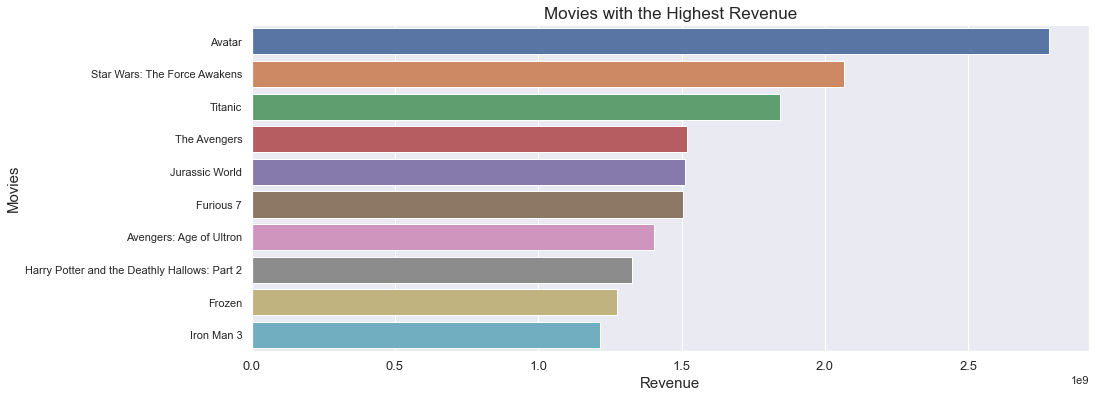

In [123]:
# Plotting a bar char to show movie with highest revenue
sns.barplot(x='revenue', y='original_title', data=top10_rev)
sns.set(rc={"figure.figsize":(14, 6)})
plt.title('Movies with the Highest Revenue', fontsize=17)
plt.xticks(fontsize=13)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('Movies', fontsize=15);

> **From the visual above we can see that Avatar is the movie with the highest budget. Ironically Avatar is not even in the top 10 movies with the highest budget, but we see Jurassic world which is our most popular movie, made an appearance in the top 10 revenue list. We also see Avengers: Age of Ultron returned the energy that was put into it, Unfortunately We cannot say the same for The Warrior's Way.**

### Question 3  Does User ratings have any effect on Popularity?

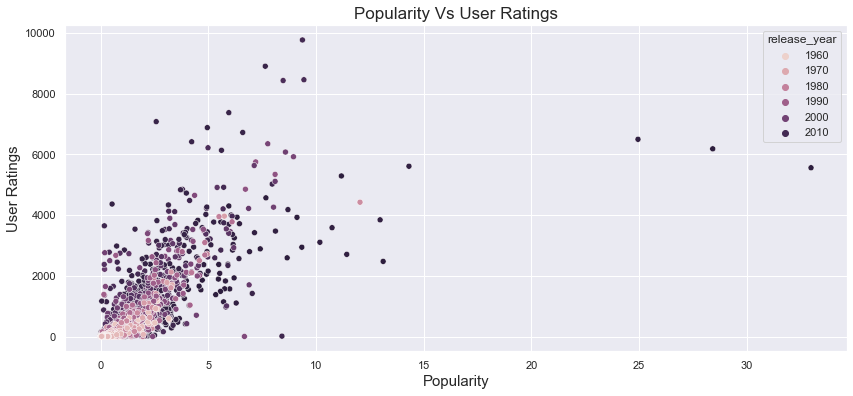

In [124]:
# Plotting a scatter chart to show correlation between user rating and popularity
sns.scatterplot(x='popularity', y='vote_count', data=movie_df, hue='release_year')
sns.set(rc={"figure.figsize":(6, 4)})
plt.title('Popularity Vs User Ratings', fontsize=17)
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('User Ratings', fontsize=15);

> **From this scatter plot we can see that there is no correlation between User ratings(vote_count) and Popularity. Meaning the popularity of a movie does not depend on the ratings of the viewers, and the ratings do not have any effect on the popularity.**

### Question 4 How does User Ratings affect the Revenue of a Movie?

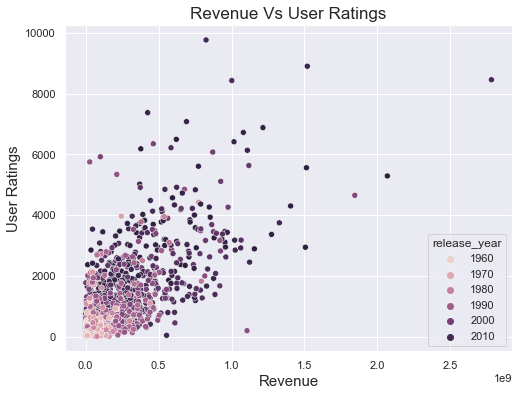

In [131]:
# Plotting a scaterplot to show correlation between vote_count and revenue
sns.scatterplot(x='revenue', y='vote_count', data=movie_df, hue='release_year')
sns.set(rc={"figure.figsize":(10, 6)})
plt.title('Revenue Vs User Ratings', fontsize=17)
plt.xlabel('Revenue', fontsize=15)
plt.ylabel('User Ratings', fontsize=15);

>**From the scatterplot above we can see that there is no correlation between user ratings and revenue. Therefore we cannot say user rating is a deciding factor for a movie's revenue.**

###  Question 5 Are Movies with expensive Budgets profitable?

In [132]:
# We will add a profit column to the movie dataframe by subtracting the budget column from the revenue column
movie_df['profit'] = movie_df['revenue'] - movie_df['budget']
movie_df.head(2)

,id,popularity,budget,revenue,original_title,cast,director,runtime,genres,release_date,vote_count,vote_average,release_year,profit
0,135397,32.985763,150000000.0,1.513529e+09,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,Colin Trevorrow,124,Action|Adventure|Science Fiction|Thriller,6/9/15,5562,6.5,2015,1.363529e+09
1,76341,28.419936,150000000.0,3.784364e+08,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,George Miller,120,Action|Adventure|Science Fiction|Thriller,5/13/15,6185,7.1,2015,2.284364e+08


In [133]:
# To plot the chart for the movies with the most expensive budgets, we will filter out the top 10 expensive movies into a new dataframe
movie_profit = movie_df[['original_title', 'budget', 'profit', 'vote_count']].sort_values(by='budget', ascending=False).head(10)
movie_profit

,original_title,budget,profit,vote_count
2244,The Warrior's Way,425000000.0,-4.139124e+08,74
3375,Pirates of the Caribbean: On Stranger Tides,380000000.0,6.416830e+08,3180
7387,Pirates of the Caribbean: At World's End,300000000.0,6.610000e+08,2626
14,Avengers: Age of Ultron,280000000.0,1.125036e+09,4304
6570,Superman Returns,270000000.0,1.210812e+08,834
4411,John Carter,260000000.0,2.413910e+07,1479
1929,Tangled,260000000.0,3.317949e+08,2019
7394,Spider-Man 3,258000000.0,6.328716e+08,2083
5508,The Lone Ranger,255000000.0,-1.657101e+08,1607
4363,The Dark Knight Rises,250000000.0,8.310413e+08,6723


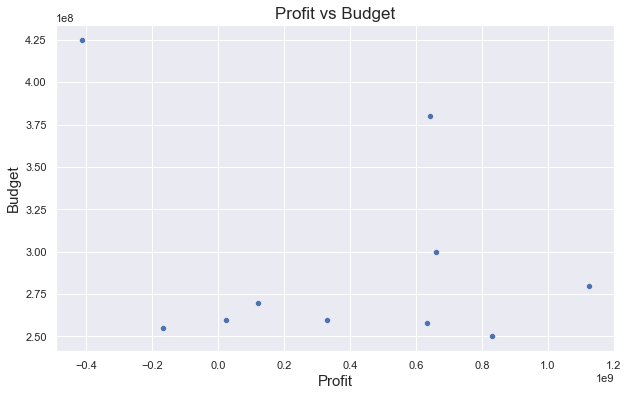

In [134]:
# Plotting a lineplot to show the trend between budget and profit
sns.scatterplot(x='profit', y='budget', data=movie_profit)
sns.set(rc={"figure.figsize":(6, 4)})
plt.title('Profit vs Budget', fontsize=17)
plt.xlabel('Profit', fontsize=15)
plt.ylabel('Budget', fontsize=15);

> **We see from the scatterplot, that there is not even a hint of correlation between budget and profit. This means that the profit made from a movie does not depend on the budget spent on the movie, quite sad if you ask me.**

### Question 6 What is the movie  with the highest Profit?  

In [135]:
movie_profit = movie_df[['original_title', 'budget', 'profit', 'vote_count']].sort_values(by='profit', ascending=False).head(10)
movie_profit

,original_title,budget,profit,vote_count
1386,Avatar,237000000.0,2.544506e+09,8458
3,Star Wars: The Force Awakens,200000000.0,1.868178e+09,5292
5231,Titanic,200000000.0,1.645034e+09,4654
0,Jurassic World,150000000.0,1.363529e+09,5562
4,Furious 7,190000000.0,1.316249e+09,2947
4361,The Avengers,220000000.0,1.299558e+09,8903
3374,Harry Potter and the Deathly Hallows: Part 2,125000000.0,1.202818e+09,3750
14,Avengers: Age of Ultron,280000000.0,1.125036e+09,4304
5422,Frozen,150000000.0,1.124219e+09,3369
8094,The Net,22000000.0,1.084280e+09,201


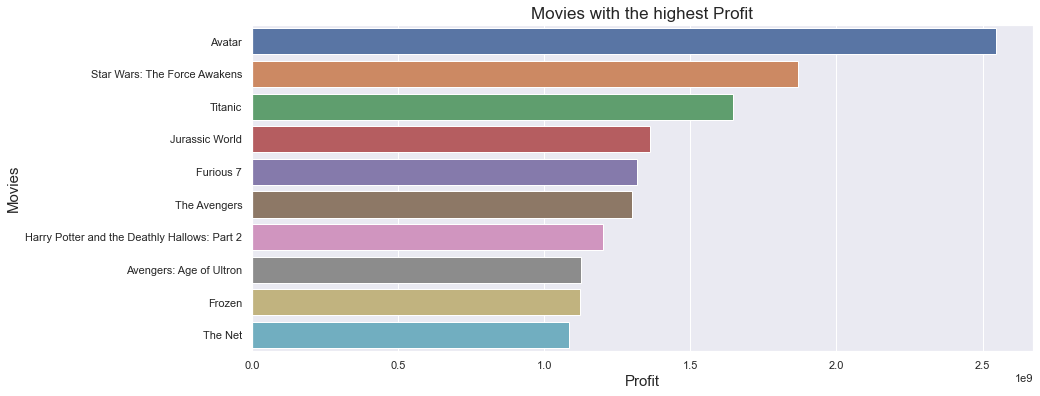

In [137]:
# Plotting a bar chart to show the movie with the highest profit
sns.barplot(x='profit', y='original_title', data=movie_profit)
sns.set(rc={"figure.figsize":(14, 6)})
plt.title('Movies with the highest Profit', fontsize=17)
plt.xlabel('Profit', fontsize=15)
plt.ylabel('Movies', fontsize=15);

> **The movie with the highest profit is Avatar, with over 1billion. It's quite interesting how The movie with the highest budget, The Warrior's way is unarguably one of the lowest profitable movies, in the top 10 list.**

### Question 7 Does User Ratings have any effect on Profit?

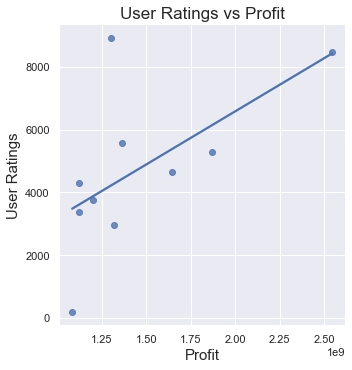

In [138]:
# Plotting a scatterplot to show correlation between Profit and User ratings
sns.lmplot(x='profit', y='vote_count', data=movie_profit, ci=None)
sns.set(rc={"figure.figsize":(12, 6)})
plt.title('User Ratings vs Profit', fontsize=17)
plt.xlabel('Profit', fontsize=15)
plt.ylabel('User Ratings', fontsize=15);

> **The scatterplot above shows a weak positive correlation between the top 10 movie profits and user ratings, this means that although both tend to go up in response to the other. The relationship is not very strong.**

### Question 8 Does the Length of a movie affect the  popularity of a movie?

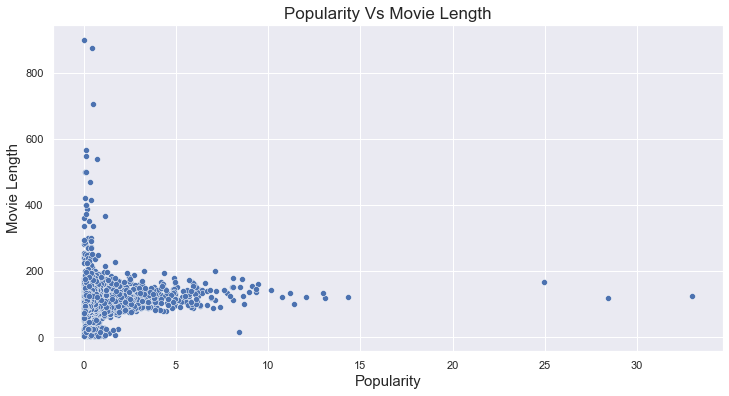

In [139]:
# Plotting a scatter chart to show correlation
sns.scatterplot(x='popularity', y='runtime', data=movie_df)
sns.set(rc={"figure.figsize":(12, 8)})
plt.title('Popularity Vs Movie Length', fontsize=17)
plt.xlabel('Popularity', fontsize=15)
plt.ylabel('Movie Length', fontsize=15);

> **From the scatter plot above we can see that the length of a movie has no effect on the popularity of the movie.**

### Question 9 What is the year with the highest number of movie release?

In [141]:
# Counting the numbers of movie released per year
year = movie_df.groupby('release_year').count()['id']
year.head(10)

release_year
1960    32
1961    31
1962    32
1963    34
1964    42
1965    35
1966    46
1967    38
1968    38
1969    30
Name: id, dtype: int64

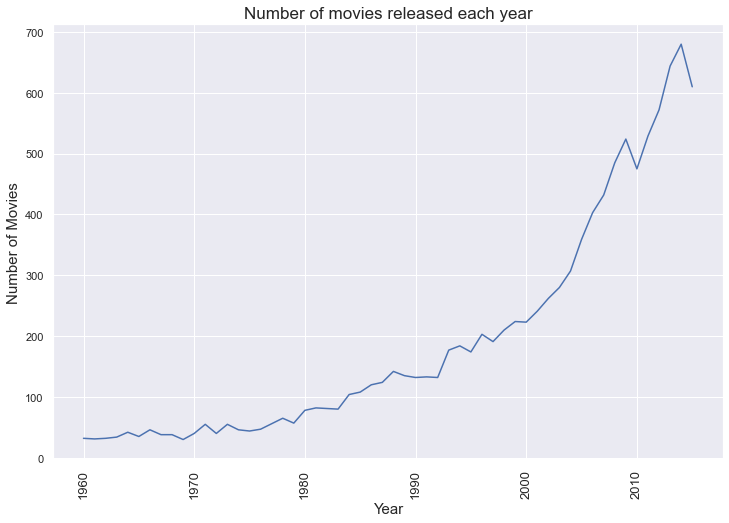

In [142]:
# Plotting a line chart to show the trend over the years 
sns.lineplot(data=year)
sns.set(rc={"figure.figsize":(15, 6)})
plt.title('Number of movies released each year', fontsize=17)
plt.xticks(fontsize=13, rotation=90)
plt.xlabel('Year', fontsize=15)
plt.ylabel('Number of Movies', fontsize=15);

> **The line plot shows the tren of number of movies released each year and we can see that there is an increase in the number of movies released each year. We also observe that 2014 is the year with the highest number of movie releases with 680 movies.**

<a id='conclusions'></a>
## Conclusions

>We can see from our exploration that the most popular movie of all time Jurassic park, which is the fifth movie with the highest revenue. Although it was not part of the top 10 movies with the highest budget. 

> We aslo observed that the movie with the highest budget: The Warrior's way, was not among the top 10 most popular movies of all time, neither was it among the the top 10 movies with the highest revenue and profit. it's easy to conclude that people didn't like it that much but that would be implying causation.

> Looking at our visualizations we can see that there is no correlation between User ratings and Popularity as well as User ratings and revenue. So we cannot imply causation in the context of how people's felings affected the revenue and popularity of movies.

> The movie with the highest revenue and profit is Avatar, which is ironic seeing as it wasn't among the top 10 popular movies or the movies with the highest budget, which proves that there is no correlation in this case between profit and budget. Although there is a weak correlation between user ratings and profit, we cannot still imply that because that Avatar had the highest profits because it had high user ratings.

> From our top 10 sample we also observed that not all movies with expensive budget are profitable, honorable mention, The Warrior's Way

>Futhermore based on our visualization, we conclude that the length of a movie, that is runtime, has no wffect on the popularity of the movie

>Finally we see that there is an increase in the trend of number of movies released each year. This shows that over the years, the movie industry as thrived in an imoressive way, proving that there is a demand for more each year.


### Limitations
> The Genres and Cast columns contained pipe characters(|), so it was difficult to explore the area of that dataset.

> Data Integrity:There were so many zero values in the budget and revenue columns, which had to be replaced with null values.

> There was no clarity on the units of the budget and revenue columns.

> I did not consider the vote_average column so the rating score may be bias.

> I ignored the budget_adj andt revenue_adj columns

> I also did not really explore the properties that contributed to a movie success